In [8]:
import arrow
import json
import pandas as pd
import numpy as np
import requests

%matplotlib inline 
import matplotlib.pyplot as plt

In [9]:
endpoint = 'http://localhost:8000'
country_codes = ['DK', 'ES', 'FR']
start, end = [
    arrow.get(2016, 11, 1),
    arrow.get(2016, 12, 1)
]
time_span = map(lambda o: o[0], arrow.Arrow.span_range('hour', start, end))

In [10]:
r = requests.session()

In [128]:
def fetch_production(country_code, t):
    url = '%s/v1/production' % endpoint
    params = {
        'countryCode': country_code,
        'datetime': t.to('utc').isoformat()
    }
    obj = r.get(url, params=params).json()
    if not obj: return
    return obj if (t - arrow.get(obj['datetime'])).total_seconds() < 3600 else None
print time_span[0], fetch_production(country_codes[0], time_span[0])

2016-11-01T00:00:00+00:00 None


In [129]:
# Fetch all country production data
dates = map(lambda t: pd.Timestamp(t.datetime), time_span)
df_wind = pd.DataFrame(np.zeros((len(time_span), len(country_codes)))*np.nan, index=dates, columns=country_codes)
df_solar = pd.DataFrame(np.zeros((len(time_span), len(country_codes)))*np.nan, index=dates, columns=country_codes)

for country_code in country_codes:
    print 'Fetching %s..' % country_code
    for t in time_span:
        o = fetch_production(country_code, t)
        if not o: continue
        t = arrow.get(o['datetime']).datetime
        if o.get('production', {}).get('wind', None) is not None:
            df_wind.loc[t, country_code] = o['production']['wind']
        if o.get('production', {}).get('solar', None) is not None:
            df_solar.loc[t, country_code] = o['production']['solar']
# TODO: write in a cache

Fetching DK..
Fetching ES..
Fetching FR..


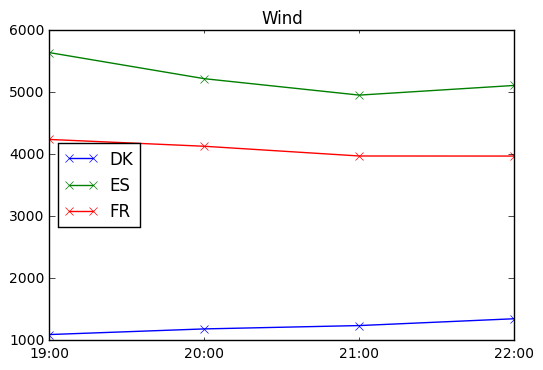

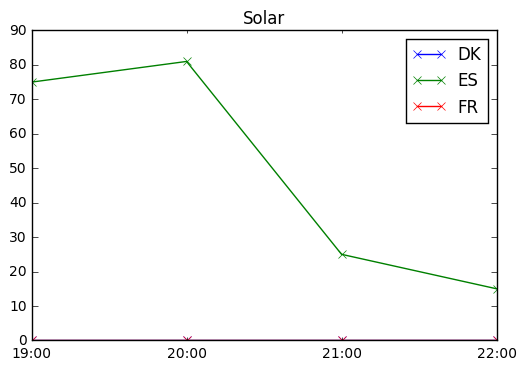

In [130]:
df_wind.dropna().plot(marker='x', title='Wind')
df_solar.dropna().plot(marker='x', title='Solar')

In [33]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from feeder.parsers import wind, solar

# Force a reload
reload(wind)
reload(solar)

def fetch_best_forecast(t):
    obj = wind.fetch_wind(r, t, compress=False)
    # Interpolate
    # ...
    return obj

def get_wind_measurements(country_code, wind_grid):
    # Return list of wind measurements inside the country
    pass

In [34]:
obj = fetch_best_forecast(arrow.now())

var t_before = moment(obj.forecasts[0][0].header.refTime).add(obj.forecasts[0][0].header.forecastTime, 'hours');
var t_after = moment(obj.forecasts[1][0].header.refTime).add(obj.forecasts[1][0].header.forecastTime, 'hours');
console.log('#1 wind forecast target', 
    t_before.fromNow(),
    'made', moment(wind.forecasts[0][0].header.refTime).fromNow());
console.log('#2 wind forecast target',
    t_after.fromNow(),
    'made', moment(wind.forecasts[1][0].header.refTime).fromNow());
# Interpolate wind
var now = (new Date()).getTime();
var interpolatedWind = wind.forecasts[0];
if (moment(now) > moment(t_after)) {
    console.error('Error while interpolating wind because current time is out of bounds');
} else {
    var k = (now - t_before)/(t_after - t_before);
    interpolatedWind[0].data = interpolatedWind[0].data.map(function (d, i) {
        return d3.interpolate(d, wind.forecasts[1][0].data[i])(k)
    });
    interpolatedWind[1].data = interpolatedWind[1].data.map(function (d, i) {
        return d3.interpolate(d, wind.forecasts[1][1].data[i])(k)
    });

Fetching forecast of 2016-11-24T12:00:00+01:00 made at 2016-11-24T12:00:00+01:00
Trying instead to fetch forecast of 2016-11-24T12:00:00+01:00 made at 2016-11-24T06:00:00+01:00
Fetching forecast of 2016-11-24T15:00:00+01:00 made at 2016-11-24T12:00:00+01:00
Trying instead to fetch forecast of 2016-11-24T15:00:00+01:00 made at 2016-11-24T06:00:00+01:00
Done
{'forecasts': [[{u'header': {u'productDefinitionTemplate': 0, u'surface1Type': 103, u'scanMode': 0, u'genProcessType': 2, u'winds': u'true', u'productStatus': 0, u'disciplineName': u'Meteorological products', u'parameterUnit': u'm.s-1', u'significanceOfRT': 1, u'productDefinitionTemplateName': u'Analysis/forecast at horizontal level/layer at a point in time', u'centerName': u'US National Weather Service - NCEP(WMC)', u'la1': 90.0, u'la2': -90.0, u'discipline': 0, u'lo2': 359.0, u'subcenter': 0, u'surface2Value': 0.0, u'significanceOfRTName': u'Start of forecast', u'surface1Value': 10.0, u'parameterNumberName': u'U-component_of_wind',

['BASE',
 'MULTIPLE_HORIZON',
 'MULTIPLE_ORIGIN',
 'NE',
 'SW',
 '__builtins__',
 '__doc__',
 '__file__',
 '__name__',
 '__package__',
 'arrow',
 'fetch_forecast',
 'fetch_wind',
 'get_url',
 'gzip',
 'json',
 'pygrib',
 'subprocess']